<a href="https://colab.research.google.com/github/azkbrqlna/2025-ComputerVision/blob/main/Jobsheet2_KlasifikasiGambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum D1 - Memulai Klasifikasi Gambar dengan Dataset Sederhana

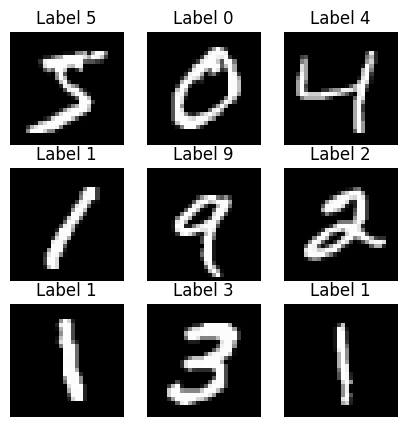

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh 9 gambar pertama
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label {y_train[i]}")
    plt.axis('off')

plt.show()

### Tugas Kecil : Cobalah ganti `range(9)` dengan `range(25)` untuk menampilkan lebih banyak contoh!

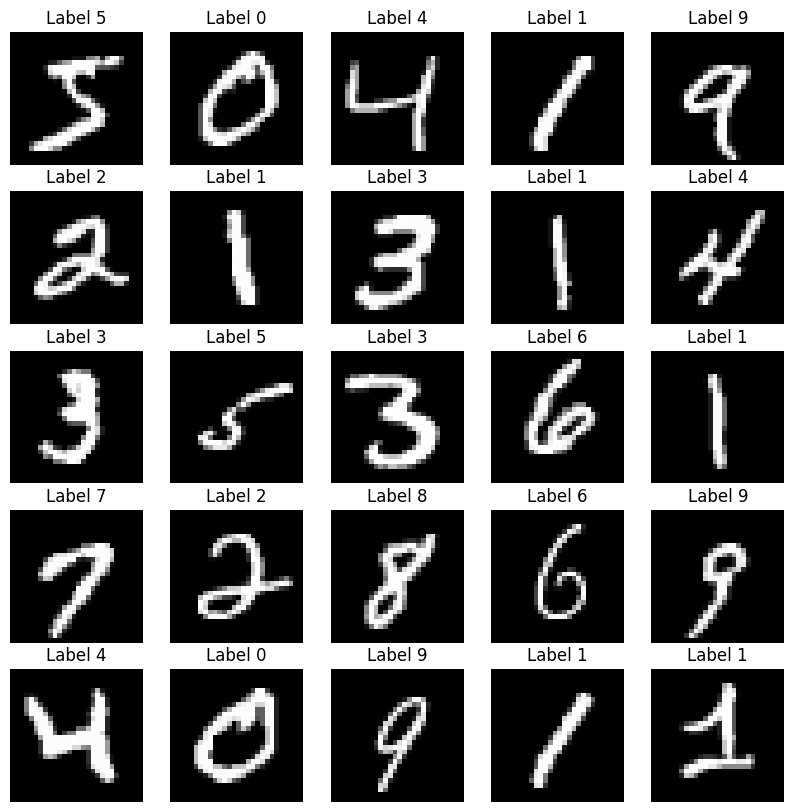

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label {y_train[i]}")
    plt.axis('off')

plt.show()

## Praktikum D2 - Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [24]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

y_pred = clf.predict(x_test_flat)
print(f"Akurasi : {accuracy_score(y_test, y_pred)}")


Akurasi : 0.9101


### Tugas Kecil : Ubah kernel dari `linear` menjadi `rbf`. Bagaimana pengaruhnya terhadap

In [25]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

y_pred = clf.predict(x_test_flat)
print(f"Akurasi : {accuracy_score(y_test, y_pred)}")


Akurasi : 0.9513


## Praktikum D3 - Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8939 - loss: 0.3672 - val_accuracy: 0.9770 - val_loss: 0.0761
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9807 - loss: 0.0643 - val_accuracy: 0.9803 - val_loss: 0.0667
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9867 - loss: 0.0432 - val_accuracy: 0.9880 - val_loss: 0.0487
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9909 - loss: 0.0289 - val_accuracy: 0.9880 - val_loss: 0.0522
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9935 - loss: 0.0213 - val_accuracy: 0.9860 - val_loss: 0.0518


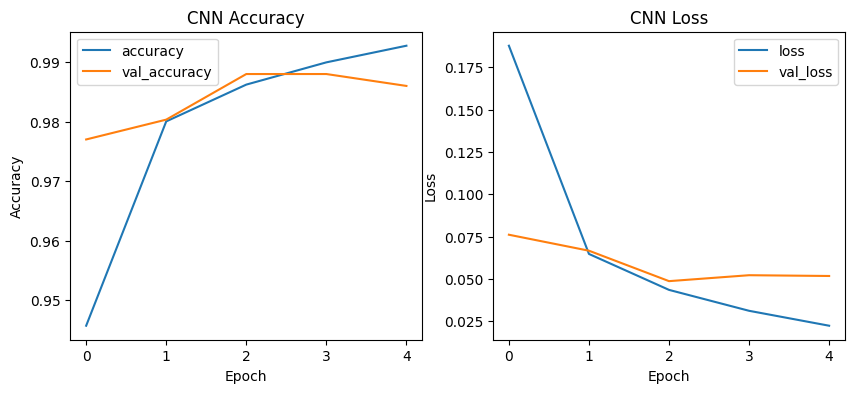

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=(0.1))

# Plot History
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Tugas kecil: Tambahkan satu lapisan Conv2D lagi sebelum Flatten. Apakah akurasinya meningkat?



Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8951 - loss: 0.3427 - val_accuracy: 0.9860 - val_loss: 0.0496
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9836 - loss: 0.0524 - val_accuracy: 0.9880 - val_loss: 0.0420
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9891 - loss: 0.0331 - val_accuracy: 0.9897 - val_loss: 0.0383
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9922 - loss: 0.0234 - val_accuracy: 0.9893 - val_loss: 0.0365
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9946 - loss: 0.0169 - val_accuracy: 0.9917 - val_loss: 0.0357


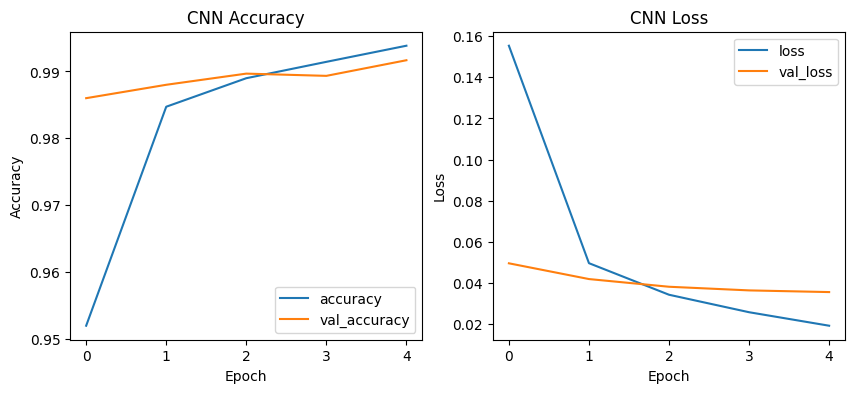

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), # Saya menambahkan ini
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=(0.1))

# Plot History
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Praktikum D4 - Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3692 - loss: 1.7318 - val_accuracy: 0.5578 - val_loss: 1.2268
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5855 - loss: 1.1772 - val_accuracy: 0.6328 - val_loss: 1.0575
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6411 - loss: 1.0274 - val_accuracy: 0.6590 - val_loss: 0.9969
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6791 - loss: 0.9247 - val_accuracy: 0.6802 - val_loss: 0.9458
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6984 - loss: 0.8563 - val_accuracy: 0.6844 - val_loss: 0.9260
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7239 - loss: 0.7960 - val_accuracy: 0.6912 - val_loss: 0.8983
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7418 - loss: 0.7436 - val_accuracy: 0.6990 - val_loss: 0.9025
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7584 - loss: 0.6965 -

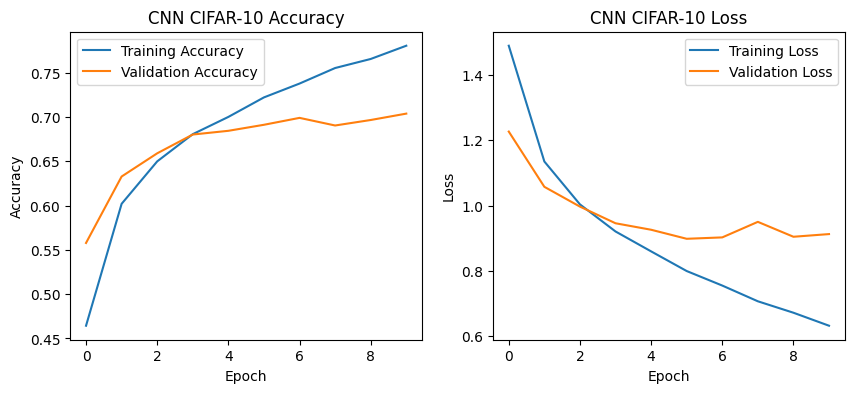

In [28]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot History =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Tugas kecil: Coba tambahkan `Dropout(0.5)` sebelum lapisan Dense terakhir. Apa pengaruhnya pada overfitting?

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3086 - loss: 1.8639 - val_accuracy: 0.5330 - val_loss: 1.3089
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4889 - loss: 1.4134 - val_accuracy: 0.6054 - val_loss: 1.1451
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5471 - loss: 1.2661 - val_accuracy: 0.6388 - val_loss: 1.0436
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5871 - loss: 1.1672 - val_accuracy: 0.6596 - val_loss: 0.9824
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6129 - loss: 1.1071 - val_accuracy: 0.6654 - val_loss: 0.9473
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6305 - loss: 1.0460 - val_accuracy: 0.6786 - val_loss: 0.9528
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6435 - loss: 1.0045 - val_accuracy: 0.6948 - val_loss: 0.8859
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6605 - loss: 0.9553 

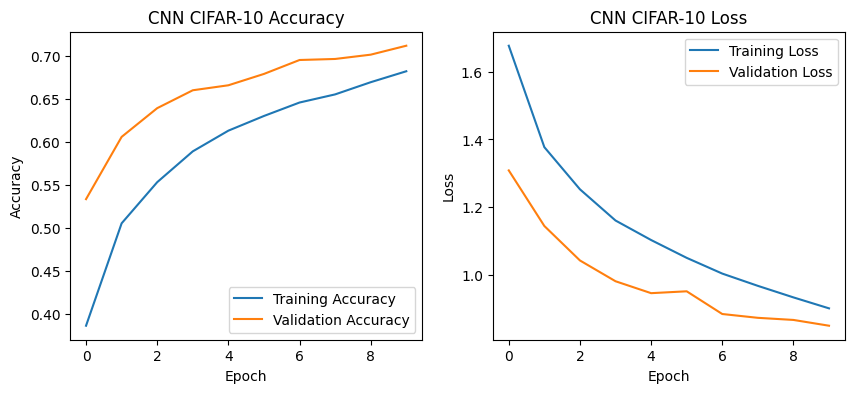

In [29]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot History =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum D5 - Transfer Learning dengan Model Pra-Latih

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.4553 - loss: 1.5613 - val_accuracy: 0.5720 - val_loss: 1.2182
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5784 - loss: 1.2112 - val_accuracy: 0.5854 - val_loss: 1.1819
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5982 - loss: 1.1487 - val_accuracy: 0.6002 - val_loss: 1.1371
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6137 - loss: 1.1010 - val_accuracy: 0.5952 - val_loss: 1.1390
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6279 - loss: 1.0706 - val_accuracy: 0.6038 - val_loss: 1.1217


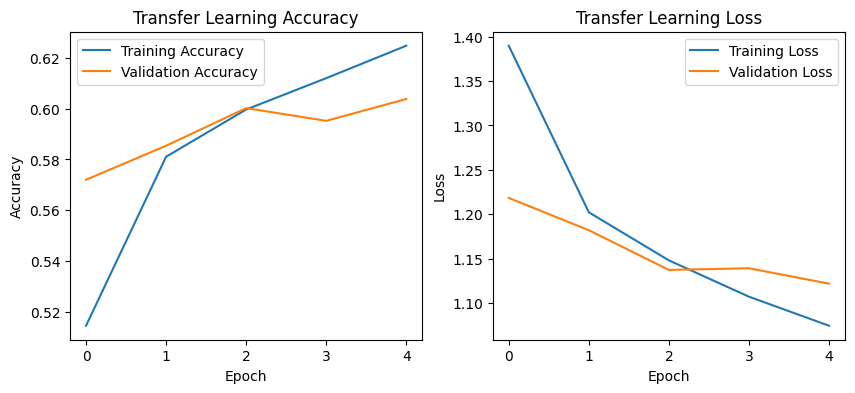

In [30]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Tugas kecil: Coba aktifkan 1–2 lapisan terakhir dari `base_model `(fine-tuning). Bagaimana akurasinya berubah?

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5042 - loss: 1.4193 - val_accuracy: 0.6144 - val_loss: 1.0804
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.6334 - loss: 1.0524 - val_accuracy: 0.6302 - val_loss: 1.0291
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6563 - loss: 0.9716 - val_accuracy: 0.6494 - val_loss: 1.0172
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6733 - loss: 0.9343 - val_accuracy: 0.6594 - val_loss: 0.9780
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6894 - loss: 0.8887 - val_accuracy: 0.6452 - val_loss: 1.0468


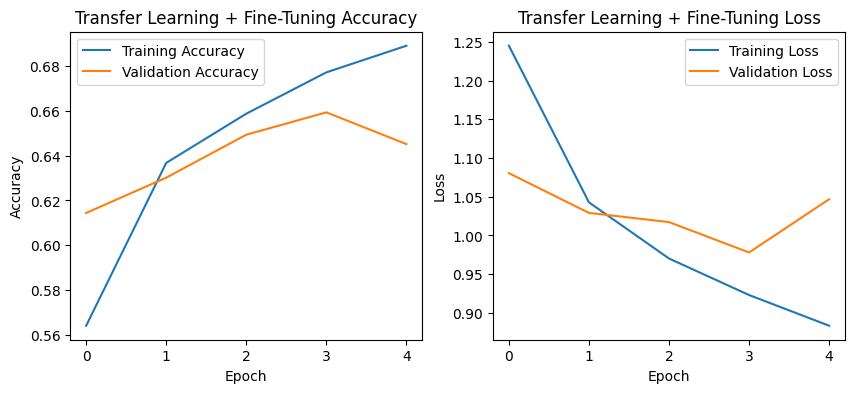

In [31]:
from tensorflow.keras.applications import VGG16

# Load base VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Aktifkan fine-tuning hanya di 2 layer terakhir
base_model.trainable = True
for layer in base_model.layers[:-2]:
    layer.trainable = False

# Bangun model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning + Fine-Tuning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning + Fine-Tuning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum D6 - Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
              precision    recall  f1-score   support

           0       0.66      0.81      0.73      1000
           1       0.64      0.83      0.72      1000
           2       0.64      0.52      0.57      1000
           3       0.64      0.32      0.43      1000
           4       0.62      0.56      0.59      1000
           5       0.62      0.51      0.56      1000
           6       0.69      0.66      0.67      1000
           7       0.59      0.82      0.68      1000
           8       0.86      0.61      0.72      1000
           9       0.59      0.80      0.68      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000



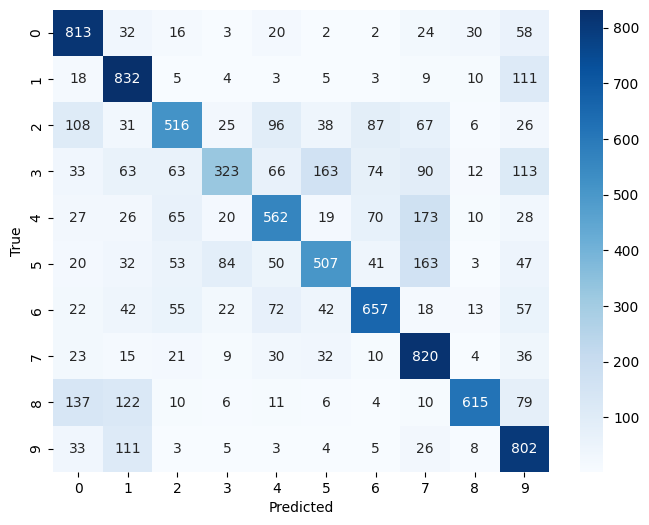

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
